# EDA on 5-Star and 1-Star Reviews <br>
This notebook aims to perform some exploratory data analysis for 5-star and 1-star reviews for the Gcash and Paymaya app dating from January 1, 2020 to May 31, 2021. The reviews were scraped from both the Google Play Store and the Apple App Store. The following points of interest will be explored: <br>
- The number of 1-star and 5-star reviews for both Gcash and Paymaya
- The possibility of spikes in posted reviews for both apps
- Top words for both 1-star and 5-star reviews

## Part 1: Comparing both Apps in Terms of Review Count

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
import nltk
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import regex as re
import contractions
import spacy

### Data Cleaning

In [2]:
# FUNCTIONS

# Function for cleaning appstore df
def clean_app_store_df(df):
  clean_df = df.copy()   #make a copy of the df 
  clean_df = clean_df.drop(['userName', 'app_name', 'app_id', 'developerResponse', 'isEdited'], axis=1) # drop unwanted columns 
  clean_df['Dates'] = pd.to_datetime(clean_df['date']).dt.date # Format date 
  clean_df['Time'] = pd.to_datetime(clean_df['date']).dt.time  # Format time
  clean_df = clean_df.drop('date', axis=1)
  clean_df['final_review'] = clean_df.title.map(str) + " " + clean_df.review # Create final review column (join heading + content)
  clean_df = clean_df.drop(['title', 'review'], axis=1)
  return clean_df

# Function for cleaning playstore df
def clean_play_store_df(df):
  clean_df = df.copy()   #make a copy of the df 
  clean_df = clean_df.drop(['_id', 'app_id', 'app_name', 'replyContent', 'reviewCreatedVersion', 'reviewId', 'userImage', 'userName'], axis=1) # drop unwanted columns 
  clean_df['Dates'] = pd.to_datetime(clean_df['at']).dt.date # Format date 
  clean_df['Time'] = pd.to_datetime(clean_df['at']).dt.time  # Format time
  clean_df = clean_df.drop('at', axis=1)
  clean_df.rename(columns={'content':'final_review'}, inplace=True)
  return clean_df

# Function to filter df by this timeframe: 2020-1-1 to 2021-5-31
def filter_timeframe_df(df): 
  df = df[(df['Dates']>datetime.date(2020,1,1)) & (df['Dates']<datetime.date(2021,5,31))] #filter
  df = df.reset_index(drop=True) #drop index
  return df 

In [3]:
# Reading appstore dataframes
gcash_apps_df = pd.read_csv('/Mynt Capstone/repo/capstone-project/Data/Raw/App Store/GCash/gcash_0613-1427.csv')
pm_app_df = pd.read_csv('/Mynt Capstone/repo/capstone-project/Data/Raw/App Store/PayMaya/paymaya_0613-1402.csv')

# Reading playstore dataframes
gcash_play_df = pd.read_csv('/Mynt Capstone/repo/capstone-project/Data/Raw/Play Store/gcash_reviews_playstore.csv')
pm_play_df = pd.read_csv('/Mynt Capstone/repo/capstone-project/Data/Raw/Play Store/paymaya_reviews_playstore.csv')

In [4]:
# Getting clean dataframes
# Reading appstore dataframes
gcash_apps_df = clean_app_store_df(gcash_apps_df)
pm_app_df = clean_app_store_df(pm_app_df)

# Reading playstore dataframes
gcash_play_df = clean_play_store_df(gcash_play_df)
pm_play_df = clean_play_store_df(pm_play_df)

In [5]:
gcash_apps_df.head()

,rating,Dates,Time,final_review
0,3,2018-12-29,15:24:59,It is starting to become pretty annoying Almos...
1,5,2020-05-16,07:33:32,Actually ok. This app gets so many negative re...
2,3,2020-02-04,00:25:57,Cash In Concern A little bit disappointed when...
3,1,2019-12-10,09:43:52,Frustrating and slow and you’re a bunch of thi...
4,1,2018-06-26,18:43:31,Payments don’t post. My payment via gcash did ...


In [6]:
gcash_play_df.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time
0,0,Good for mobile online deals.,1,0,NaN,2021-06-02,18:32:37
1,1,Ilang beses nang naulit na nag load ako nag ba...,1,0,NaN,2021-06-02,18:32:14
2,2,Its a great experience and convenient,4,0,NaN,2021-06-02,18:32:07
3,3,Ok na ok sya para sa mga easy transaction lalo...,5,0,NaN,2021-06-02,18:31:31
4,4,very helpful and contented,5,0,NaN,2021-06-02,18:31:25


### Filtering by Date

In [7]:
# Getting clean dataframes
# Reading appstore dataframes
gcash_apps_df = filter_timeframe_df(gcash_apps_df)
pm_app_df = filter_timeframe_df(pm_app_df)

# Reading playstore dataframes
gcash_play_df = filter_timeframe_df(gcash_play_df)
pm_play_df = filter_timeframe_df(pm_play_df)

In [27]:
gcash_apps_df.head()

,rating,Dates,Time,final_review
0,5,2020-05-16,07:33:32,Actually ok. This app gets so many negative re...
1,3,2020-02-04,00:25:57,Cash In Concern A little bit disappointed when...
2,5,2020-06-07,04:57:17,Gcash user since 2018 I've been using gcash fo...
3,1,2020-04-26,04:57:47,GCash is Losing its Prime Okay GCash dati 3-4 ...
4,5,2021-01-12,09:46:26,Read please!! Those others who doesn’t like gc...


In [8]:
gcash_play_df.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time
0,4547,Very good,5,0,NaN,2021-05-30,23:59:34
1,4548,So good app to me,5,0,NaN,2021-05-30,23:57:27
2,4549,Excellent!,5,0,NaN,2021-05-30,23:45:41
3,4550,It is easy to sending money and load by Gcash.,5,0,NaN,2021-05-30,23:45:05
4,4551,Love it,5,0,NaN,2021-05-30,23:33:04


In [13]:
gcash_play_df.sort_values('Dates', ascending = False).head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time
0,4547,Very good,5,0,NaN,2021-05-30,23:59:34
109,4656,Sometimes offline,4,1,NaN,2021-05-30,09:19:28
93,4640,Please include student id for verification so ...,1,0,NaN,2021-05-30,11:35:58
94,4641,Customer service deserve no star to be honest.,1,0,NaN,2021-05-30,11:33:45
95,4642,This is a good paying app,5,0,NaN,2021-05-30,11:28:14


In [15]:
gcash_apps_df.sort_values('Dates', ascending = False).head()

,rating,Dates,Time,final_review
2048,1,2021-05-30,06:38:52,WORST APP EVER Worst app an customer service
527,4,2021-05-30,13:30:42,Payment problems Gcash keeps blocking my payme...
636,2,2021-05-30,08:39:15,GCredit Application Page is Buggy I was not ab...
156,1,2021-05-30,15:06:51,Great but worse The app itself is amazing - it...
922,3,2021-05-29,22:31:59,Do not reset the dashboard Every update I had ...


### Getting 5-Star and 1-Star Reviews

**A. Gcash**

**- Play Store**

In [10]:
gcash_play_df_final = gcash_play_df[(gcash_play_df['score'] == 5) | (gcash_play_df['score'] == 1)]
gcash_play_df_final.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time
0,4547,Very good,5,0,NaN,2021-05-30,23:59:34
1,4548,So good app to me,5,0,NaN,2021-05-30,23:57:27
2,4549,Excellent!,5,0,NaN,2021-05-30,23:45:41
3,4550,It is easy to sending money and load by Gcash.,5,0,NaN,2021-05-30,23:45:05
4,4551,Love it,5,0,NaN,2021-05-30,23:33:04


In [11]:
gcash_play_df_final['score'].value_counts()

5    76663
1    28228
Name: score, dtype: int64

**- App Store**

In [12]:
gcash_apps_df_final = gcash_apps_df[(gcash_apps_df['rating'] == 5) | (gcash_apps_df['rating'] == 1)]
gcash_apps_df_final.head()

,rating,Dates,Time,final_review
0,5,2020-05-16,07:33:32,Actually ok. This app gets so many negative re...
2,5,2020-06-07,04:57:17,Gcash user since 2018 I've been using gcash fo...
3,1,2020-04-26,04:57:47,GCash is Losing its Prime Okay GCash dati 3-4 ...
4,5,2021-01-12,09:46:26,Read please!! Those others who doesn’t like gc...
6,1,2020-02-10,15:45:41,Awful experience This is the worst experience ...


In [13]:
gcash_apps_df_final['rating'].value_counts()

1    1456
5     182
Name: rating, dtype: int64

**B. Paymaya**

**- Play Store**

In [14]:
pm_play_df_final = pm_play_df[(pm_play_df['score'] == 5) | (pm_play_df['score'] == 1)]
pm_play_df_final.head()

,final_review,repliedAt,score,thumbsUpCount,Dates,Time
0,I'm playing all ready,NaN,5,0,2021-05-30,23:55:17
1,Mas favor ko ang actual card ng application da...,NaN,5,0,2021-05-30,23:42:56
2,nice,NaN,5,0,2021-05-30,23:31:00
3,Verynice,NaN,5,0,2021-05-30,23:28:53
4,maganda ang paymaya,NaN,5,0,2021-05-30,23:07:43


In [15]:
pm_play_df_final['score'].value_counts()

5    40103
1    10043
Name: score, dtype: int64

**- App Store**

In [16]:
pm_app_df_final = pm_app_df[(pm_app_df['rating'] == 5) | (pm_app_df['rating'] == 1)]
pm_app_df_final.head()

,rating,Dates,Time,final_review
0,5,2020-03-30,01:10:54,VERY BAD SERVICE I have been contacting them a...
1,1,2020-08-06,03:55:14,Very poor customer service There should be a z...
2,1,2020-05-02,01:58:12,App is great but service is not I really loved...
3,1,2020-04-09,01:32:02,Make your app trustworthy really Comeon this i...
4,1,2020-12-01,07:59:56,The new update... Ok so lets be honest I love ...


In [17]:
pm_app_df_final['rating'].value_counts()

1    575
5    434
Name: rating, dtype: int64

### Plotting by Review Count

In [19]:
#Grouped both dataframes from the Play Store to be able to plot the bar graph
gcash_play_df_final['App'] = 'Gcash'
pm_play_df_final['App'] = 'Paymaya'

playstore_df = gcash_play_df_final.append(pm_play_df_final, ignore_index = True)

<ipython-input-19-94c835878cef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcash_play_df_final['App'] = 'Gcash'
<ipython-input-19-94c835878cef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_play_df_final['App'] = 'Paymaya'


In [20]:
playstore_df.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time,App
0,4547.0,Very good,5,0,NaN,2021-05-30,23:59:34,Gcash
1,4548.0,So good app to me,5,0,NaN,2021-05-30,23:57:27,Gcash
2,4549.0,Excellent!,5,0,NaN,2021-05-30,23:45:41,Gcash
3,4550.0,It is easy to sending money and load by Gcash.,5,0,NaN,2021-05-30,23:45:05,Gcash
4,4551.0,Love it,5,0,NaN,2021-05-30,23:33:04,Gcash


<Figure size 720x720 with 0 Axes>

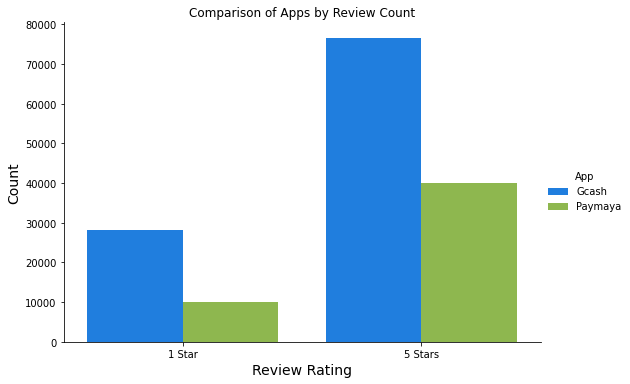

In [62]:
colors = ['#007dfe', '#92c83e']
sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(10, 10))

ax = sns.catplot( x='score',
             kind="count", 
             hue="App", 
             height=5, 
             aspect=1.5,
             data=playstore_df)
ax.despine()
ax.set_xticklabels(['1 Star','5 Stars'])
plt.xlabel("Review Rating", size=14)
plt.ylabel("Count", size=14)
plt.title('Comparison of Apps by Review Count')
plt.savefig("/Mynt Capstone/graphs/playstore_countplot.png", bbox_inches='tight')

In [ ]:
def get_percentage(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

get_percentage(ax, )

In [21]:
gcash_apps_df_final['App'] = 'Gcash'
pm_app_df_final['App'] = 'Paymaya'

appstore_df = gcash_apps_df_final.append(pm_app_df_final, ignore_index = True)

<ipython-input-21-390d61bcc892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcash_apps_df_final['App'] = 'Gcash'
<ipython-input-21-390d61bcc892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_app_df_final['App'] = 'Paymaya'


In [22]:
appstore_df.head()

,rating,Dates,Time,final_review,App
0,5,2020-05-16,07:33:32,Actually ok. This app gets so many negative re...,Gcash
1,5,2020-06-07,04:57:17,Gcash user since 2018 I've been using gcash fo...,Gcash
2,1,2020-04-26,04:57:47,GCash is Losing its Prime Okay GCash dati 3-4 ...,Gcash
3,5,2021-01-12,09:46:26,Read please!! Those others who doesn’t like gc...,Gcash
4,1,2020-02-10,15:45:41,Awful experience This is the worst experience ...,Gcash


<Figure size 720x720 with 0 Axes>

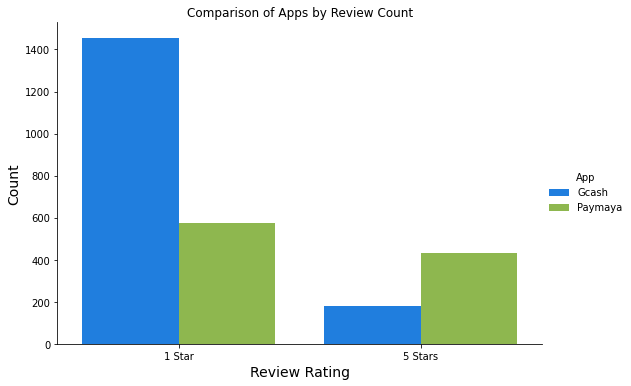

In [61]:
colors = ['#007dfe', '#92c83e']
sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(10, 10))

ax = sns.catplot( x='rating',
             kind="count", 
             hue="App", 
             height=5, 
             aspect=1.5,
             data=appstore_df)
ax.despine()
ax.set_xticklabels(['1 Star','5 Stars'])
plt.xlabel("Review Rating", size=14)
plt.ylabel("Count", size=14)
plt.title('Comparison of Apps by Review Count')
plt.savefig("/Mynt Capstone/graphs/appstore_countplot.png", bbox_inches='tight')

## Part 2: Analyzing the Time Series of the Reviews by App

### Grouping the Data by Month and Year

In [75]:
playstore_df['Dates'] = pd.to_datetime(playstore_df['Dates'])

In [106]:
playstore_grouped = playstore_df['Dates'].groupby([playstore_df.Dates.dt.year, playstore_df.Dates.dt.month, playstore_df.App, playstore_df.score]).agg('count')
playstore_grouped = playstore_grouped.to_frame()
playstore_grouped

Dates
Dates Dates App     score       
2020  1     Gcash   1        861
                    5       3012
            Paymaya 1        515
                    5       1463
      2     Gcash   1        491
...                          ...
2021  4     Paymaya 5       4638
      5     Gcash   1       1631
                    5       3342
            Paymaya 1        499
                    5       4258

[68 rows x 1 columns]

In [120]:
count_list = playstore_grouped['Dates'].to_list()

In [108]:
date_list = [ '2020-01', '2020-01', '2020-01', '2020-01',
              '2020-02', '2020-02', '2020-02', '2020-02',
              '2020-03', '2020-03', '2020-03', '2020-03',
              '2020-04', '2020-04', '2020-04', '2020-04',
              '2020-05', '2020-05', '2020-05', '2020-05',
              '2020-06', '2020-06', '2020-06', '2020-06',
              '2020-07', '2020-07', '2020-07', '2020-07',
              '2020-08', '2020-08', '2020-08', '2020-08',
              '2020-09', '2020-09', '2020-09', '2020-09',
              '2020-10', '2020-10', '2020-10', '2020-10',
              '2020-11', '2020-11', '2020-11', '2020-11',
              '2020-12', '2020-12', '2020-12', '2020-12',
              '2021-01', '2021-01', '2021-01', '2021-01',
              '2021-02', '2021-02', '2021-02', '2021-02',
              '2021-03', '2021-03', '2021-03', '2021-03',
              '2021-04', '2021-04', '2021-04', '2021-04',
              '2021-05', '2021-05', '2021-05', '2021-05',
]

In [115]:
app_list = ['Gcash', 'Gcash', 'Paymaya', 'Paymaya']*17

In [118]:
score_list = ['1', '5']*34

### Google Play Store Reviews

In [121]:
playstore_timeseries = pd.DataFrame(list(zip(date_list, app_list, score_list, count_list)),
               columns =['Date', 'App', 'Rating', 'Count'])
playstore_timeseries.head()

,Date,App,Rating,Count
0,2020-01,Gcash,1,861
1,2020-01,Gcash,5,3012
2,2020-01,Paymaya,1,515
3,2020-01,Paymaya,5,1463
4,2020-02,Gcash,1,491


### Play Store (1-Star Reviews)

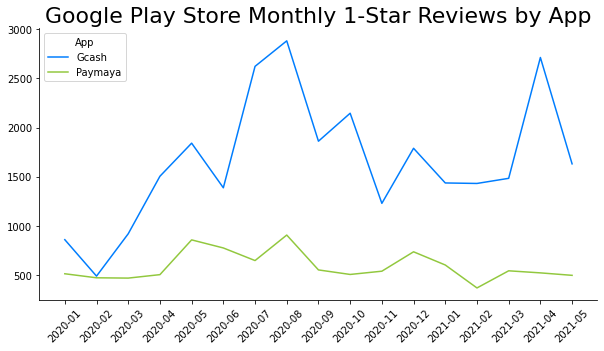

In [156]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x="Date", y="Count", hue="App", data=playstore_timeseries[playstore_timeseries['Rating'] == '1'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Google Play Store Monthly 1-Star Reviews by App', size = 22)
plt.xticks(rotation=45)
plt.savefig("/Mynt Capstone/graphs/timeseries_playstore_1.png", bbox_inches='tight')

### Play Store (5-Star Reviews)

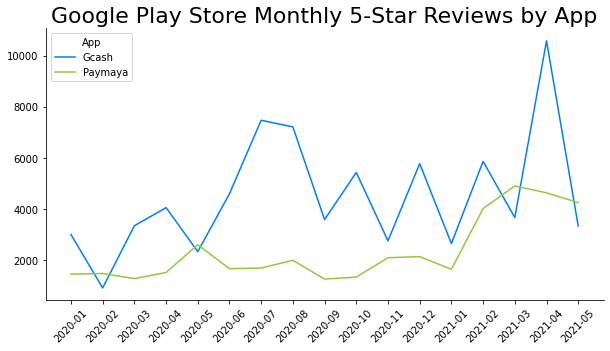

In [155]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x="Date", y="Count", hue="App", data=playstore_timeseries[playstore_timeseries['Rating'] == '5'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Google Play Store Monthly 5-Star Reviews by App', size = 22)
plt.xticks(rotation=45)
plt.savefig("/Mynt Capstone/graphs/timeseries_playstore_5.png", bbox_inches='tight')

### Apple App Store Reviews

In [123]:
appstore_df['Dates'] = pd.to_datetime(appstore_df['Dates'])

In [124]:
appstore_df.head()

,rating,Dates,Time,final_review,App
0,5,2020-05-16,07:33:32,Actually ok. This app gets so many negative re...,Gcash
1,5,2020-06-07,04:57:17,Gcash user since 2018 I've been using gcash fo...,Gcash
2,1,2020-04-26,04:57:47,GCash is Losing its Prime Okay GCash dati 3-4 ...,Gcash
3,5,2021-01-12,09:46:26,Read please!! Those others who doesn’t like gc...,Gcash
4,1,2020-02-10,15:45:41,Awful experience This is the worst experience ...,Gcash


In [141]:
appstore_grouped = appstore_df['Dates'].groupby([appstore_df.Dates.dt.year, appstore_df.Dates.dt.month, appstore_df.App, appstore_df.rating]).agg('count')
appstore_grouped = appstore_grouped.to_frame()
appstore_grouped

Dates
Dates Dates App     rating       
2020  1     Gcash   1          64
                    5           3
            Paymaya 1          45
                    5           5
      2     Gcash   1          62
...                           ...
2021  4     Paymaya 5          68
      5     Gcash   1          74
                    5           8
            Paymaya 1          18
                    5          51

[68 rows x 1 columns]

In [142]:
count_list = appstore_grouped['Dates'].to_list()

In [143]:
date_list = [ '2020-01', '2020-01', '2020-01', '2020-01',
              '2020-02', '2020-02', '2020-02', '2020-02',
              '2020-03', '2020-03', '2020-03', '2020-03',
              '2020-04', '2020-04', '2020-04', '2020-04',
              '2020-05', '2020-05', '2020-05', '2020-05',
              '2020-06', '2020-06', '2020-06', '2020-06',
              '2020-07', '2020-07', '2020-07', '2020-07',
              '2020-08', '2020-08', '2020-08', '2020-08',
              '2020-09', '2020-09', '2020-09', '2020-09',
              '2020-10', '2020-10', '2020-10', '2020-10',
              '2020-11', '2020-11', '2020-11', '2020-11',
              '2020-12', '2020-12', '2020-12', '2020-12',
              '2021-01', '2021-01', '2021-01', '2021-01',
              '2021-02', '2021-02', '2021-02', '2021-02',
              '2021-03', '2021-03', '2021-03', '2021-03',
              '2021-04', '2021-04', '2021-04', '2021-04',
              '2021-05', '2021-05', '2021-05', '2021-05',
]

In [144]:
app_list = ['Gcash', 'Gcash', 'Paymaya', 'Paymaya']*17

In [145]:
score_list = ['1', '5']*34

In [148]:
appstore_timeseries = pd.DataFrame(list(zip(date_list, app_list, score_list, count_list)),
               columns =['Date', 'App', 'Rating', 'Count'])
appstore_timeseries.head()

,Date,App,Rating,Count
0,2020-01,Gcash,1,64
1,2020-01,Gcash,5,3
2,2020-01,Paymaya,1,45
3,2020-01,Paymaya,5,5
4,2020-02,Gcash,1,62


### App Store (1-Star Reviews)

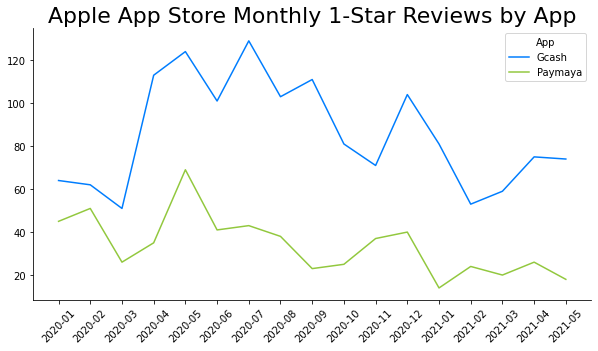

In [154]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x="Date", y="Count", hue="App", data=appstore_timeseries[appstore_timeseries['Rating'] == '1'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Apple App Store Monthly 1-Star Reviews by App', size = 22)
plt.xticks(rotation=45)
plt.savefig("/Mynt Capstone/graphs/timeseries_appstore_1.png", bbox_inches='tight')

### App Store (5-Star Reviews)

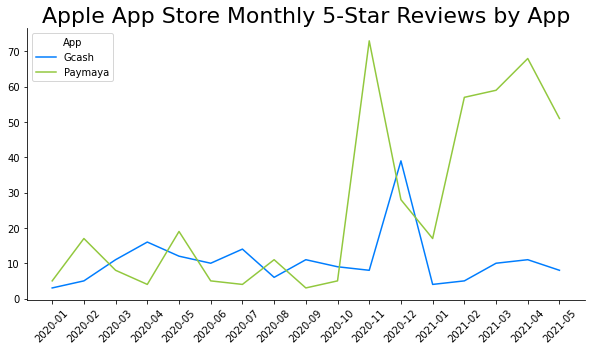

In [153]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x="Date", y="Count", hue="App", data=appstore_timeseries[appstore_timeseries['Rating'] == '5'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Apple App Store Monthly 5-Star Reviews by App', size = 22)
plt.xticks(rotation=45)
plt.savefig("/Mynt Capstone/graphs/timeseries_appstore_5.png", bbox_inches='tight')

## Part 3: Getting the Top Words for 1-star and 5-star Reviews

In [23]:
appstore_df.head()

,rating,Dates,Time,final_review,App
0,5,2020-05-16,07:33:32,Actually ok. This app gets so many negative re...,Gcash
1,5,2020-06-07,04:57:17,Gcash user since 2018 I've been using gcash fo...,Gcash
2,1,2020-04-26,04:57:47,GCash is Losing its Prime Okay GCash dati 3-4 ...,Gcash
3,5,2021-01-12,09:46:26,Read please!! Those others who doesn’t like gc...,Gcash
4,1,2020-02-10,15:45:41,Awful experience This is the worst experience ...,Gcash


In [97]:
playstore_df.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time,App
0,4547.0,Very good,5,0,NaN,2021-05-30,23:59:34,Gcash
1,4548.0,So good app to me,5,0,NaN,2021-05-30,23:57:27,Gcash
2,4549.0,Excellent!,5,0,NaN,2021-05-30,23:45:41,Gcash
3,4550.0,It is easy to sending money and load by Gcash.,5,0,NaN,2021-05-30,23:45:05,Gcash
4,4551.0,Love it,5,0,NaN,2021-05-30,23:33:04,Gcash


In [60]:
#Getting the different dataframes

#Google Play Store Reviews Split by App and Score
playstore_gcash_5 = playstore_df[(playstore_df['App'] == 'Gcash') & (playstore_df['score'] == 5)]
playstore_gcash_1 = playstore_df[(playstore_df['App'] == 'Gcash') & (playstore_df['score'] == 1)]
playstore_pm_5 = playstore_df[(playstore_df['App'] == 'Paymaya') & (playstore_df['score'] == 5)]
playstore_pm_1 = playstore_df[(playstore_df['App'] == 'Paymaya') & (playstore_df['score'] == 1)]

apps_gcash_5 = appstore_df[(appstore_df['App'] == 'Gcash') & (appstore_df['rating'] == 5)]
apps_gcash_1 = appstore_df[(appstore_df['App'] == 'Gcash') & (appstore_df['rating'] == 1)]
apps_pm_5 = appstore_df[(appstore_df['App'] == 'Paymaya') & (appstore_df['rating'] == 5)]
apps_pm_1 = appstore_df[(appstore_df['App'] == 'Paymaya') & (appstore_df['rating'] == 1)]

### Trial 1: Text cleaning + Stopword Removal -> Lemmatization -> Bigrams / Trigrams Formation -> TFIDF

In [61]:
# Remove emojis and emoticons

# Function to remove emoji's
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

# Function for removing URL's
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

### Preprocessing Function

In [62]:
def preprocess(corpus, column):
    corpus[column].dropna(inplace=True) # Drop blank rows
    corpus[column] = corpus[column].astype(str)
    corpus[column] = [entry.lower() for entry in corpus[column]] # Lowercase text
    corpus[column] = corpus[column].apply(lambda x: remove_emoji(x)) #Remove emoji's
    corpus[column] = corpus[column].apply(lambda x: remove_emoticons(x)) #Remove emoticons
    corpus[column] = corpus[column].apply(lambda x: remove_urls(x)) #Remove URL's
    corpus[column] = corpus[column].apply(lambda x: contractions.fix(x)) # Expand contractions
    corpus[column] = corpus[column].apply(lambda x: str(TextBlob(x))) # Correct spelling
    corpus[column] = corpus[column].str.replace("[^a-zA-Z#]", " ") # Remove unwanted characters, numbers and symbols
    corpus[column] = corpus[column].str.replace(r'\r+|\n+|\t+','', regex=True) #Remove \n \t \r
    corpus[column] = corpus[column].str.replace('[^\w\s]','') # Remove punctuation

### Stop Word List Generation

In [63]:
from spacy.lang.tl.stop_words import STOP_WORDS as tl_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

In [64]:
final_stopwords_list = list(tl_stop) + list(en_stop) + \
['app','po', 'please', 'i', 'thank', 'nyo', 'lang', 'pag', 'mag', 'nag', 'rin', 'nyu', 'kau', 'naman', 'mo']

### Text Cleaning

In [99]:
preprocess(playstore_gcash_5, 'final_review')
preprocess(playstore_gcash_1, 'final_review')
preprocess(playstore_pm_5, 'final_review')
preprocess(playstore_pm_1, 'final_review')

preprocess(apps_gcash_5, 'final_review')
preprocess(apps_gcash_1, 'final_review')
preprocess(apps_pm_5, 'final_review')
preprocess(apps_pm_1, 'final_review')

<ipython-input-62-ed0750d5fac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus[column].dropna(inplace=True) # Drop blank rows
<ipython-input-62-ed0750d5fac9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus[column] = corpus[column].astype(str)
<ipython-input-62-ed0750d5fac9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [66]:
playstore_gcash_5.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time,App
0,4547.0,very good,5,0,NaN,2021-05-30,23:59:34,Gcash
1,4548.0,so good app to me,5,0,NaN,2021-05-30,23:57:27,Gcash
2,4549.0,excellent,5,0,NaN,2021-05-30,23:45:41,Gcash
3,4550.0,it is easy to sending money and load by gcash,5,0,NaN,2021-05-30,23:45:05,Gcash
4,4551.0,love it,5,0,NaN,2021-05-30,23:33:04,Gcash


In [67]:
apps_gcash_5.head()

,rating,Dates,Time,final_review,App
0,5,2020-05-16,07:33:32,actually ok this app gets so many negative re...,Gcash
1,5,2020-06-07,04:57:17,gcash user since I have been using gcash ...,Gcash
3,5,2021-01-12,09:46:26,read please those others who does not like g...,Gcash
5,5,2021-02-17,09:15:31,years and counting been using gcash for ye...,Gcash
18,5,2020-05-15,05:22:06,much better now the latest version and updated...,Gcash


### Stop Word Removal

In [68]:
playstore_gcash_5['no_stops'] = playstore_gcash_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
playstore_gcash_1['no_stops'] = playstore_gcash_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
playstore_pm_5['no_stops'] = playstore_pm_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
playstore_pm_1['no_stops'] = playstore_pm_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))

apps_gcash_5['no_stops'] = apps_gcash_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
apps_gcash_1['no_stops'] = apps_gcash_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
apps_pm_5['no_stops'] = apps_pm_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
apps_pm_1['no_stops'] = apps_pm_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))

<ipython-input-68-da833a9713c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_gcash_5['no_stops'] = playstore_gcash_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
<ipython-input-68-da833a9713c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_gcash_1['no_stops'] = playstore_gcash_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
<ipython-input-68-da833a9713c8

In [69]:
playstore_gcash_5.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time,App,no_stops
0,4547.0,very good,5,0,NaN,2021-05-30,23:59:34,Gcash,good
1,4548.0,so good app to me,5,0,NaN,2021-05-30,23:57:27,Gcash,good
2,4549.0,excellent,5,0,NaN,2021-05-30,23:45:41,Gcash,excellent
3,4550.0,it is easy to sending money and load by gcash,5,0,NaN,2021-05-30,23:45:05,Gcash,easy sending money load gcash
4,4551.0,love it,5,0,NaN,2021-05-30,23:33:04,Gcash,love


In [70]:
# lemmatizer = nltk.stem.WordNetLemmatizer()
playstore_gcash_5['lemmatized'] = playstore_gcash_5.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))
playstore_gcash_1['lemmatized'] = playstore_gcash_1.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))
playstore_pm_5['lemmatized'] = playstore_pm_5.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))
playstore_pm_1['lemmatized'] = playstore_pm_1.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))

apps_gcash_5['lemmatized'] = apps_gcash_5.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))
apps_gcash_1['lemmatized'] = apps_gcash_1.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))
apps_pm_5['lemmatized'] = apps_pm_5.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))
apps_pm_1['lemmatized'] = apps_pm_1.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))

<ipython-input-70-32a70cac97d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_gcash_5['lemmatized'] = playstore_gcash_5.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))
<ipython-input-70-32a70cac97d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_gcash_1['lemmatized'] = playstore_gcash_1.no_stops.map(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in x.split(' ')]))
<ipython-input-70-32a70cac97d6>:4: SettingWithCopyWarning: 
A value is trying to b

In [80]:
playstore_pm_1.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time,App,no_stops,lemmatized
104896,NaN,it is so hard to upgrade my account just so i ...,1,0,2021-05-31T15:38:31.000Z,2021-05-30,22:54:59,Paymaya,hard upgrade account money requires primary id...,hard upgrade account money requires primary id...
104900,NaN,cannot download the app,1,0,2021-05-31T15:39:54.000Z,2021-05-30,22:37:40,Paymaya,download,download
104906,NaN,useless csr,1,0,2021-05-31T15:42:27.000Z,2021-05-30,21:12:16,Paymaya,useless csr,useless csr
104909,NaN,maganda sana kaso napakatagal mag email back s...,1,1,NaN,2021-05-30,20:45:45,Paymaya,maganda sana kaso napakatagal email queries jusko,maganda sana kaso napakatagal email query jusko
104911,NaN,cannot student id,1,0,NaN,2021-05-30,20:22:26,Paymaya,student id,student id


### Play Store Reviews <br>
**A. Gcash** <br>
**- 1-Star Reviews**

In [72]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(playstore_gcash_1.lemmatized.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
playstore_gcash_1_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)

In [73]:
playstore_gcash_1_top10

,term,weight
8665,update,0.029059
2669,gcash,0.025544
3063,good,0.019435
67,account,0.018735
4288,load,0.016041
3486,id,0.015066
4960,money,0.015049
7315,service,0.013685
8900,use,0.013144
1068,cash,0.012917


Text(0.5, 1.0, 'Top 10 Terms for Gcash 1-Star Reviews in the Play Store')

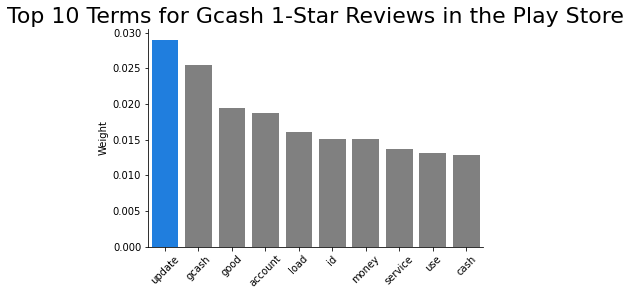

In [74]:
clrs = ['#808080' if (x < max(playstore_gcash_1_top10['weight'].to_numpy())) else '#007dfe' for x in playstore_gcash_1_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = playstore_gcash_1_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Gcash 1-Star Reviews in the Play Store', size = 22)

**- 5-Star Reviews**

In [75]:
tvec = TfidfVectorizer(min_df=5, max_df=.5, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(playstore_gcash_5.lemmatized.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
playstore_gcash_5_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
playstore_gcash_5_top10

,term,weight
1551,good,0.156391
2847,nice,0.099651
1702,great,0.048955
2985,ok,0.033330
1120,excellent,0.030157
4332,useful,0.026041
2428,love,0.023554
622,convenient,0.020377
148,apps,0.020243
245,awesome,0.019629


Text(0.5, 1.0, 'Top 10 Terms for Gcash 5-Star Reviews in the Play Store')

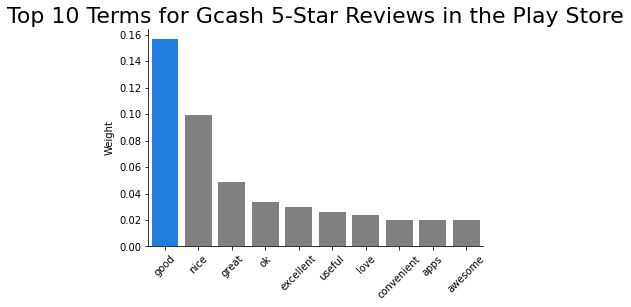

In [76]:
clrs = ['#808080' if (x < max(playstore_gcash_5_top10['weight'].to_numpy())) else '#007dfe' for x in playstore_gcash_5_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = playstore_gcash_5_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Gcash 5-Star Reviews in the Play Store', size = 22)

**B. Paymaya** <br>
**- 1-Star Reviews**

In [77]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(playstore_pm_1.lemmatized.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
playstore_pm_1_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)

In [78]:
playstore_pm_1_top10

,term,weight
37,account,0.036573
4028,upgrade,0.021773
2165,money,0.021038
2572,paymaya,0.020895
3336,service,0.020419
831,customer,0.018379
1140,error,0.017491
1399,good,0.016397
4094,use,0.015962
2974,register,0.015781


Text(0.5, 1.0, 'Top 10 Terms for Paymaya 1-Star Reviews in the Play Store')

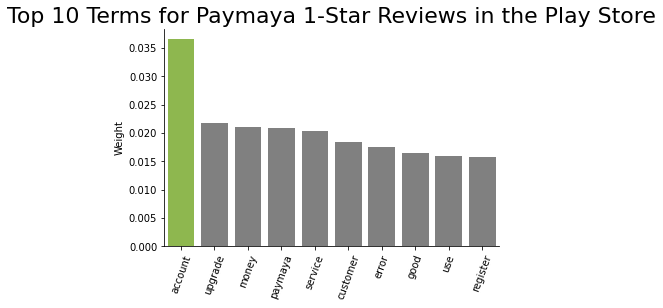

In [79]:
clrs = ['#808080' if (x < max(playstore_pm_1_top10['weight'].to_numpy())) else '#92c83e' for x in playstore_pm_1_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = playstore_pm_1_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=70)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Paymaya 1-Star Reviews in the Play Store', size = 22)

**- 5-Star Reviews**

In [81]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(playstore_pm_5.lemmatized.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
playstore_pm_5_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)

In [82]:
playstore_pm_5_top10

,term,weight
2919,good,0.095874
5343,nice,0.076301
3038,great,0.045565
8664,useful,0.029875
506,awesome,0.026767
1407,convenient,0.024136
2258,excellent,0.023072
1969,easy,0.020678
5948,paymaya,0.019884
8520,use,0.019769


Text(0.5, 1.0, 'Top 10 Terms for Paymaya 5-Star Reviews in the Play Store')

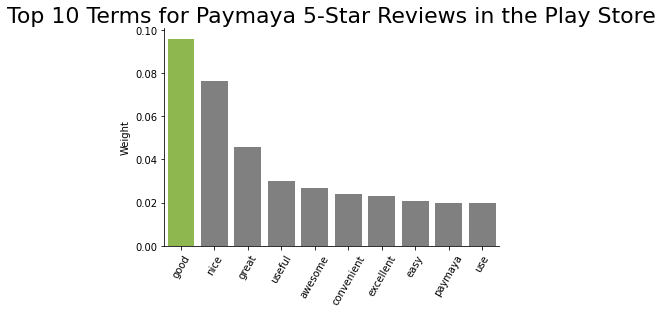

In [83]:
clrs = ['#808080' if (x < max(playstore_pm_5_top10['weight'].to_numpy())) else '#92c83e' for x in playstore_pm_5_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = playstore_pm_5_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=60)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Paymaya 5-Star Reviews in the Play Store', size = 22)

### App Store Reviews <br>
**A. Gcash** <br>
**- 1-Star Reviews**

In [85]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(apps_gcash_1.lemmatized.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
apps_gcash_1_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
apps_gcash_1_top10

,term,weight
7,account,0.036638
537,money,0.029885
961,update,0.028612
794,service,0.028297
113,cash,0.027594
393,id,0.026086
274,fix,0.023702
972,use,0.023274
995,verify,0.023132
898,time,0.022715


Text(0.5, 1.0, 'Top 10 Terms for Gcash 1-Star Reviews in the App Store')

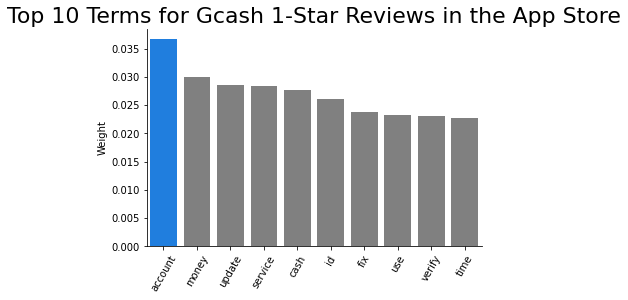

In [88]:
clrs = ['#808080' if (x < max(apps_gcash_1_top10['weight'].to_numpy())) else '#007dfe' for x in apps_gcash_1_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = apps_gcash_1_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=60)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Gcash 1-Star Reviews in the App Store', size = 22)

**- 5-Star Reviews**

In [89]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(apps_gcash_5.lemmatized.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
apps_gcash_5_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
apps_gcash_5_top10

,term,weight
38,good,0.062617
89,transaction,0.055257
61,money,0.052279
16,convenient,0.047046
56,love,0.044798
92,update,0.043249
50,like,0.039601
88,time,0.038928
93,use,0.038620
6,bank,0.038516


Text(0.5, 1.0, 'Top 10 Terms for Gcash 5-Star Reviews in the App Store')

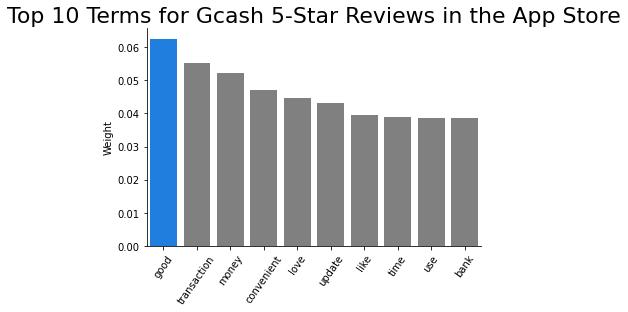

In [91]:
clrs = ['#808080' if (x < max(apps_gcash_5_top10['weight'].to_numpy())) else '#007dfe' for x in apps_gcash_5_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = apps_gcash_5_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=55)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Gcash 5-Star Reviews in the App Store', size = 22)

**B. Paymaya** <br>
**- 1-Star Reviews**

In [92]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(apps_pm_1.lemmatized.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
apps_pm_1_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
apps_pm_1_top10

,term,weight
276,money,0.049296
402,service,0.040687
476,upgrade,0.037278
71,card,0.035954
111,customer,0.034313
148,error,0.032288
483,use,0.028265
112,customer service,0.027669
446,time,0.026990
49,bank,0.025727


Text(0.5, 1.0, 'Top 10 Terms for Paymaya 1-Star Reviews in the App Store')

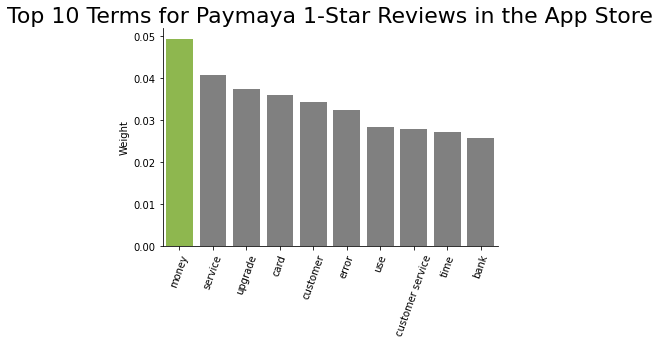

In [94]:
clrs = ['#808080' if (x < max(apps_pm_1_top10['weight'].to_numpy())) else '#92c83e' for x in apps_pm_1_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = apps_pm_1_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=70)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Paymaya 1-Star Reviews in the App Store', size = 22)

**- 5-Star Reviews**

In [95]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(apps_pm_5.lemmatized.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
apps_pm_5_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
apps_pm_5_top10

,term,weight
39,convenient,0.050459
236,use,0.048024
55,easy,0.045024
88,good,0.037375
90,great,0.037326
231,transaction,0.037151
160,payment,0.034943
127,love,0.032855
204,service,0.032533
153,pay,0.031902


Text(0.5, 1.0, 'Top 10 Terms for Paymaya 5-Star Reviews in the App Store')

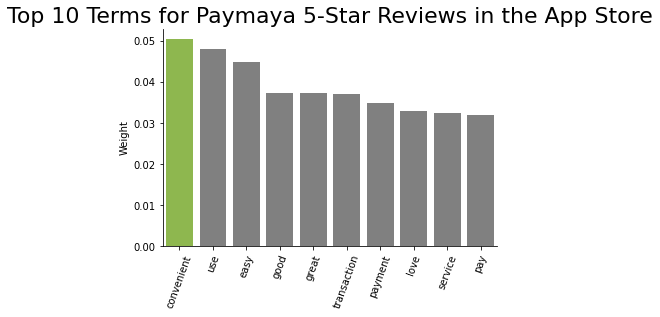

In [96]:
clrs = ['#808080' if (x < max(apps_pm_5_top10['weight'].to_numpy())) else '#92c83e' for x in apps_pm_5_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = apps_pm_5_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=70)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Paymaya 5-Star Reviews in the App Store', size = 22)

---
### Trial 2: Text cleaning + Stopword Removal -> No Lemmatization -> Bigrams / Trigrams Formation -> TFIDF

In [101]:
#Getting the different dataframes

#Google Play Store Reviews Split by App and Score
playstore_gcash_5 = playstore_df[(playstore_df['App'] == 'Gcash') & (playstore_df['score'] == 5)]
playstore_gcash_1 = playstore_df[(playstore_df['App'] == 'Gcash') & (playstore_df['score'] == 1)]
playstore_pm_5 = playstore_df[(playstore_df['App'] == 'Paymaya') & (playstore_df['score'] == 5)]
playstore_pm_1 = playstore_df[(playstore_df['App'] == 'Paymaya') & (playstore_df['score'] == 1)]

apps_gcash_5 = appstore_df[(appstore_df['App'] == 'Gcash') & (appstore_df['rating'] == 5)]
apps_gcash_1 = appstore_df[(appstore_df['App'] == 'Gcash') & (appstore_df['rating'] == 1)]
apps_pm_5 = appstore_df[(appstore_df['App'] == 'Paymaya') & (appstore_df['rating'] == 5)]
apps_pm_1 = appstore_df[(appstore_df['App'] == 'Paymaya') & (appstore_df['rating'] == 1)]

### Text Cleaning

In [102]:
preprocess(playstore_gcash_5, 'final_review')
preprocess(playstore_gcash_1, 'final_review')
preprocess(playstore_pm_5, 'final_review')
preprocess(playstore_pm_1, 'final_review')

preprocess(apps_gcash_5, 'final_review')
preprocess(apps_gcash_1, 'final_review')
preprocess(apps_pm_5, 'final_review')
preprocess(apps_pm_1, 'final_review')

<ipython-input-62-ed0750d5fac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus[column].dropna(inplace=True) # Drop blank rows
<ipython-input-62-ed0750d5fac9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus[column] = corpus[column].astype(str)
<ipython-input-62-ed0750d5fac9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

### Stopword Removal

In [103]:
playstore_gcash_5['no_stops'] = playstore_gcash_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
playstore_gcash_1['no_stops'] = playstore_gcash_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
playstore_pm_5['no_stops'] = playstore_pm_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
playstore_pm_1['no_stops'] = playstore_pm_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))

apps_gcash_5['no_stops'] = apps_gcash_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
apps_gcash_1['no_stops'] = apps_gcash_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
apps_pm_5['no_stops'] = apps_pm_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
apps_pm_1['no_stops'] = apps_pm_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))

<ipython-input-103-da833a9713c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_gcash_5['no_stops'] = playstore_gcash_5['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
<ipython-input-103-da833a9713c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_gcash_1['no_stops'] = playstore_gcash_1['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords_list)]))
<ipython-input-103-da833a971

In [104]:
playstore_gcash_5.head()

,Unnamed: 0,final_review,score,thumbsUpCount,repliedAt,Dates,Time,App,no_stops
0,4547.0,very good,5,0,NaN,2021-05-30,23:59:34,Gcash,good
1,4548.0,so good app to me,5,0,NaN,2021-05-30,23:57:27,Gcash,good
2,4549.0,excellent,5,0,NaN,2021-05-30,23:45:41,Gcash,excellent
3,4550.0,it is easy to sending money and load by gcash,5,0,NaN,2021-05-30,23:45:05,Gcash,easy sending money load gcash
4,4551.0,love it,5,0,NaN,2021-05-30,23:33:04,Gcash,love


In [105]:
apps_pm_5.head()

,rating,Dates,Time,final_review,App,no_stops
1638,5,2020-03-30,01:10:54,very bad service i have been contacting them a...,Paymaya,bad service contacting payment payment reach b...
1644,5,2020-05-23,05:39:05,frustrating password recovery help forgot my p...,Paymaya,frustrating password recovery help forgot pass...
1647,5,2020-01-27,18:37:39,paymaya is all you need guys i will never ever...,Paymaya,paymaya need guys tired recommending people kn...
1656,5,2020-05-23,13:09:00,load problem everytime it took a minute of sen...,Paymaya,load problem everytime took minute sending reg...
1657,5,2021-04-04,20:15:35,give me back my money it is been weeks since...,Paymaya,money weeks submitted complaint heard customer...


### TFIDF Without Lemmatization<br>
### Play Store Reviews
**A. Gcash** <br>
**- 1-Star Reviews**

In [106]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(playstore_gcash_1.no_stops.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
playstore_gcash_1_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
playstore_gcash_1_top10

,term,weight
8620,update,0.027708
2657,gcash,0.025579
3063,good,0.019324
63,account,0.018390
4303,load,0.015827
4965,money,0.015108
3488,id,0.014214
8843,use,0.013130
1080,cash,0.012864
7287,service,0.012568


Text(0.5, 1.0, 'Top 10 Terms for Gcash 1-Star Reviews in the Play Store')

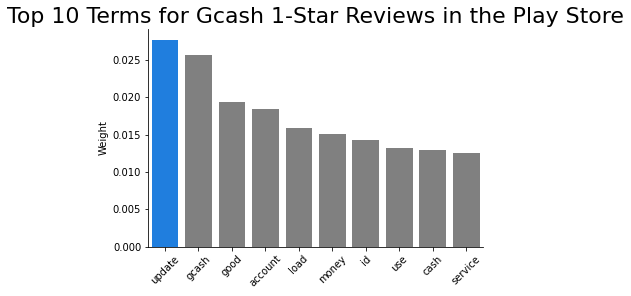

In [107]:
clrs = ['#808080' if (x < max(playstore_gcash_1_top10['weight'].to_numpy())) else '#007dfe' for x in playstore_gcash_1_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = playstore_gcash_1_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Gcash 1-Star Reviews in the Play Store', size = 22)

**- 5-Star Reviews**

In [108]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(playstore_gcash_5.no_stops.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
playstore_gcash_5_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
playstore_gcash_5_top10

,term,weight
1622,good,0.155909
2929,nice,0.099602
1775,great,0.048936
3072,ok,0.033040
1180,excellent,0.030128
4408,useful,0.026031
2503,love,0.023570
680,convenient,0.020321
150,apps,0.020260
245,awesome,0.019624


Text(0.5, 1.0, 'Top 10 Terms for Gcash 5-Star Reviews in the Play Store')

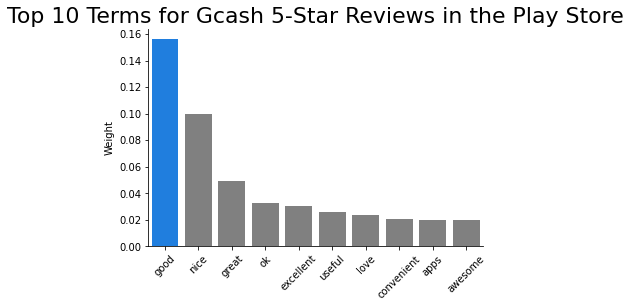

In [109]:
clrs = ['#808080' if (x < max(playstore_gcash_5_top10['weight'].to_numpy())) else '#007dfe' for x in playstore_gcash_5_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = playstore_gcash_5_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Gcash 5-Star Reviews in the Play Store', size = 22)

**B. Paymaya** <br>
**- 1-Star Reviews**

In [110]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(playstore_pm_1.no_stops.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
playstore_pm_1_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
playstore_pm_1_top10

,term,weight
36,account,0.036173
3986,upgrade,0.021581
2158,money,0.021089
2559,paymaya,0.020925
3315,service,0.019683
831,customer,0.018091
1137,error,0.017053
1399,good,0.016392
4054,use,0.016001
2954,register,0.015767


Text(0.5, 1.0, 'Top 10 Terms for Paymaya 1-Star Reviews in the Play Store')

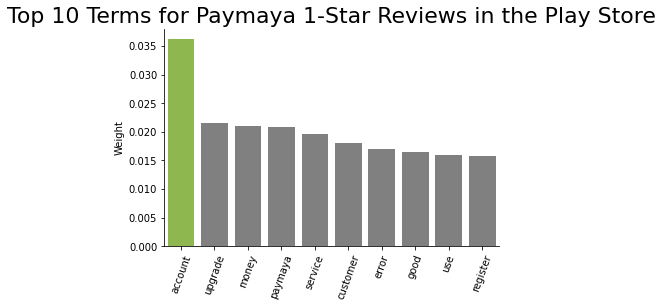

In [111]:
clrs = ['#808080' if (x < max(playstore_pm_1_top10['weight'].to_numpy())) else '#92c83e' for x in playstore_pm_1_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = playstore_pm_1_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=70)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Paymaya 1-Star Reviews in the Play Store', size = 22)

**- 5-Star Reviews**

In [112]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(playstore_pm_5.no_stops.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
playstore_pm_5_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
playstore_pm_5_top10

,term,weight
3040,good,0.095337
5430,nice,0.076276
3155,great,0.045452
8769,useful,0.029808
504,awesome,0.026755
1516,convenient,0.023979
2369,excellent,0.023021
2083,easy,0.020547
6018,paymaya,0.019866
8633,use,0.019775


Text(0.5, 1.0, 'Top 10 Terms for Paymaya 5-Star Reviews in the Play Store')

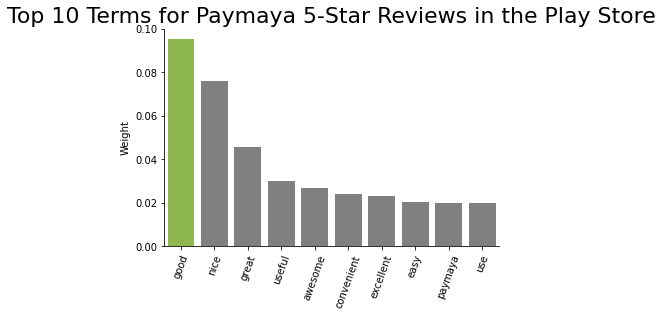

In [113]:
clrs = ['#808080' if (x < max(playstore_pm_5_top10['weight'].to_numpy())) else '#92c83e' for x in playstore_pm_5_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = playstore_pm_5_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=70)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Paymaya 5-Star Reviews in the Play Store', size = 22)

### App Store Reviews <br>
**A. Gcash** <br>
**- 1-Star Reviews**

In [114]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(apps_gcash_1.no_stops.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
apps_gcash_1_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
apps_gcash_1_top10

,term,weight
7,account,0.035777
553,money,0.030010
121,cash,0.027514
975,update,0.026242
806,service,0.026103
408,id,0.024665
290,fix,0.023206
987,use,0.023062
1011,verify,0.022693
1004,verified,0.020492


Text(0.5, 1.0, 'Top 10 Terms for Gcash 1-Star Reviews in the App Store')

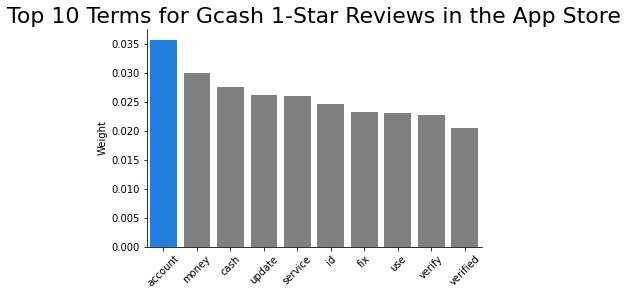

In [115]:
clrs = ['#808080' if (x < max(apps_gcash_1_top10['weight'].to_numpy())) else '#007dfe' for x in apps_gcash_1_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = apps_gcash_1_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Gcash 1-Star Reviews in the App Store', size = 22)

**- 5-Star Reviews**

In [116]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(apps_gcash_5.no_stops.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
apps_gcash_5_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
apps_gcash_5_top10

,term,weight
39,good,0.063093
59,money,0.054702
18,convenient,0.047535
54,love,0.045100
11,bills,0.040530
50,like,0.039722
90,transactions,0.039195
95,use,0.038887
94,update,0.037565
96,useful,0.036586


Text(0.5, 1.0, 'Top 10 Terms for Gcash 5-Star Reviews in the App Store')

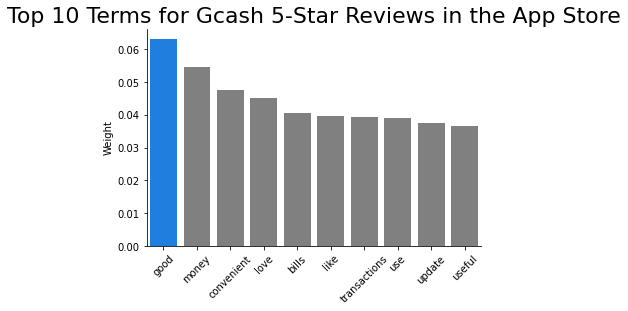

In [117]:
clrs = ['#808080' if (x < max(apps_gcash_5_top10['weight'].to_numpy())) else '#007dfe' for x in apps_gcash_5_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = apps_gcash_5_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Gcash 5-Star Reviews in the App Store', size = 22)

**B. Paymaya** <br>
**- 1-Star Reviews**

In [118]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(apps_pm_1.no_stops.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
apps_pm_1_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
apps_pm_1_top10

,term,weight
288,money,0.049377
414,service,0.039157
490,upgrade,0.037240
74,card,0.033899
115,customer,0.032557
155,error,0.031462
496,use,0.028395
116,customer service,0.027037
257,load,0.022747
189,gcash,0.022635


Text(0.5, 1.0, 'Top 10 Terms for Paymaya 1-Star Reviews in the App Store')

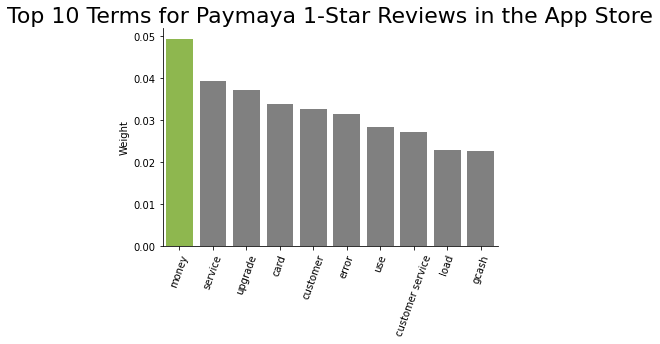

In [120]:
clrs = ['#808080' if (x < max(apps_pm_1_top10['weight'].to_numpy())) else '#92c83e' for x in apps_pm_1_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = apps_pm_1_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=70)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Paymaya 1-Star Reviews in the App Store', size = 22)

**- 5-Star Reviews**

In [121]:
tvec = TfidfVectorizer(min_df=5, max_df=.3, stop_words='english', ngram_range=(1,3))
tvec_weights = tvec.fit_transform(apps_pm_5.no_stops.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
apps_pm_5_top10 = weights_df.sort_values(by='weight', ascending=False).head(10)
apps_pm_5_top10

,term,weight
39,convenient,0.049477
241,use,0.048146
56,easy,0.045163
90,good,0.038331
92,great,0.037245
132,love,0.032548
21,bills,0.032019
156,pay,0.030522
138,money,0.028617
164,payment,0.028269


Text(0.5, 1.0, 'Top 10 Terms for Paymaya 5-Star Reviews in the App Store')

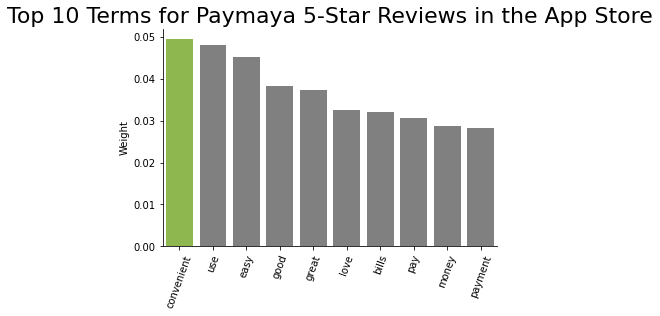

In [122]:
clrs = ['#808080' if (x < max(apps_pm_5_top10['weight'].to_numpy())) else '#92c83e' for x in apps_pm_5_top10['weight'].to_numpy() ]
ax = sns.barplot(x = 'term',
            y = 'weight',
            palette = clrs,
            data = apps_pm_5_top10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=70)
ax.set(xlabel=None)
ax.set(ylabel='Weight')
plt.title('Top 10 Terms for Paymaya 5-Star Reviews in the App Store', size = 22)

### Additional EDA

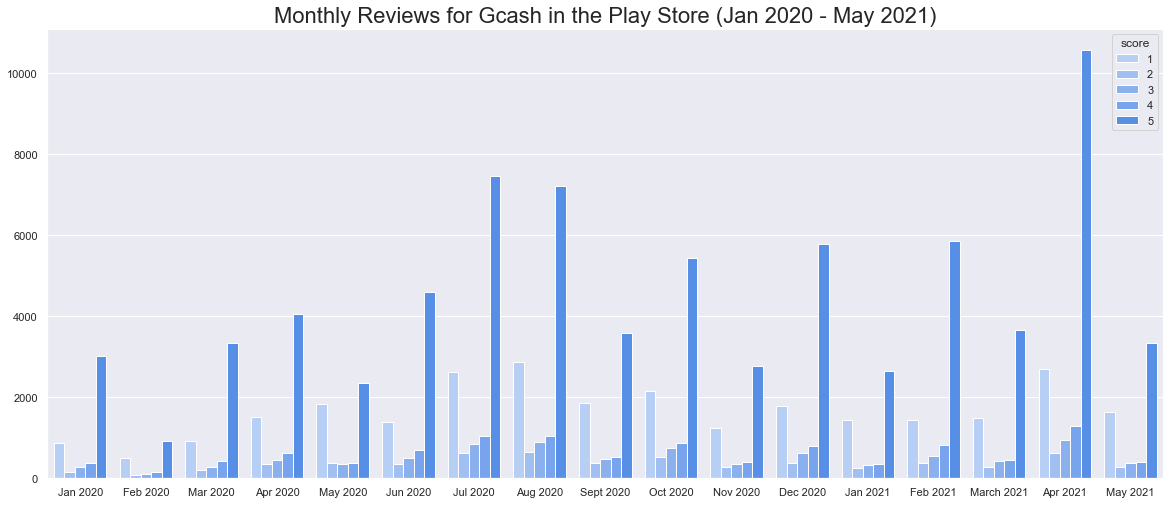

<Figure size 1440x595.44 with 0 Axes>

In [17]:
### PLAY STORE GCASH

gcash_playstore_df2 = gcash_play_df.copy()
gcash_playstore_df2['Dates'] = pd.to_datetime(gcash_playstore_df2['Dates'])
gcash_playstore_df2 = gcash_playstore_df2.set_index('Dates')
grouped_play_gcash = gcash_playstore_df2.groupby([pd.Grouper(freq='M'), 'score']).count().unstack(fill_value=0).stack()
grouped_play_gcash.to_csv('/Mynt Capstone/data/grouped_play_gcash.csv')
grouped_play_gcash = pd.read_csv('/Mynt Capstone/data/grouped_play_gcash.csv')
grouped_play_gcash = grouped_play_gcash.drop(['Time', 'Unnamed: 0', 'thumbsUpCount', 'repliedAt'], axis=1)
grouped_play_gcash = grouped_play_gcash.rename(columns = {'final_review':'count'})

colors = ['#adccff', '#93bcff', '#79acff', '#649fff', '#3f89ff']
ax = sns.barplot(x = 'Dates',
            y = 'count',
            palette = colors,
            hue = 'score',
            data = grouped_play_gcash)
plt.figure(figsize=(20, 8.27))
# plt.xticks(rotation=70)
ax.set_xticklabels(['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020',
                   'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'March 2021', 'Apr 2021', 'May 2021'])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Monthly Reviews for Gcash in the Play Store (Jan 2020 - May 2021)', fontsize=22)
plt.savefig("/Mynt Capstone/graphs/gcash_review_dist_play.png", bbox_inches='tight')
plt.show()
# group = group.reset_index()
# group = group.pivot(index = 'Dates', columns='rating', values='final_review')

# colors = ['#007dfe', '#92c83e']
# ax = sns.barplot(x = 'Dates',
#             y = 'weight',
#             palette = colors,
#             hue = 'rating',
#             data = group)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# group.plot(kind='bar', figsize=(10,10))
# plt.xticks(rotation=70)

Text(0.5, 1.0, 'Monthly Reviews for Gcash in the App Store (Jan 2020 - May 2021)')

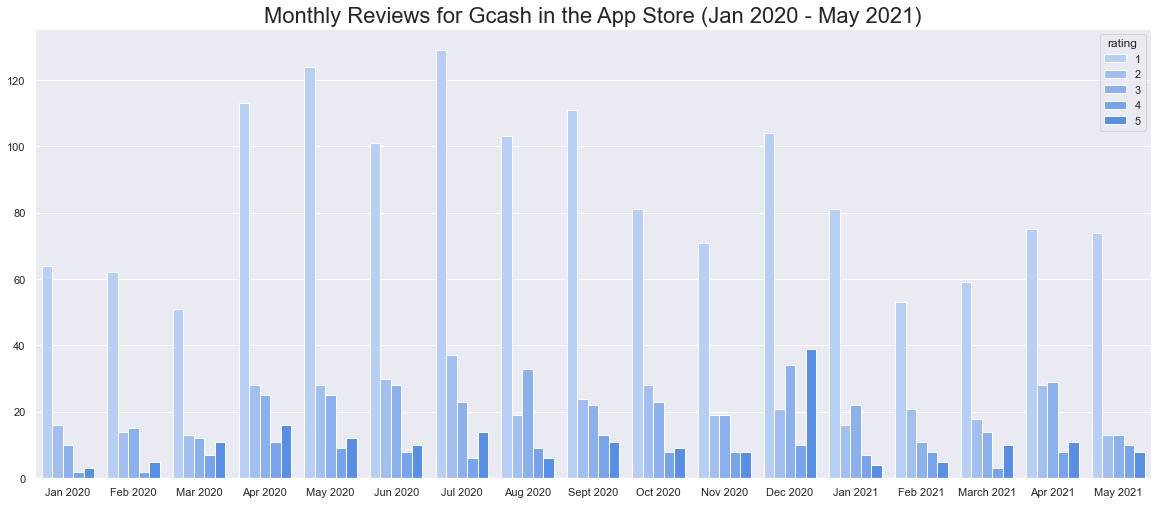

In [205]:
### APP STORE GCASH

gcash_apps_df2 = gcash_apps_df.copy()
gcash_apps_df2['Dates'] = pd.to_datetime(gcash_apps_df2['Dates'])
gcash_apps_df2 = gcash_apps_df2.set_index('Dates')
grouped_apps_gcash = gcash_apps_df2.groupby([pd.Grouper(freq='M'), 'rating']).count().unstack(fill_value=0).stack()
grouped_apps_gcash.to_csv('/Mynt Capstone/data/grouped_apps_gcash.csv')
grouped_apps_gcash = pd.read_csv('/Mynt Capstone/data/grouped_apps_gcash.csv')
grouped_apps_gcash = grouped_apps_gcash.drop(['Time'], axis=1)
grouped_apps_gcash = grouped_apps_gcash.rename(columns = {'final_review':'count'})

colors = ['#adccff', '#93bcff', '#79acff', '#649fff', '#3f89ff']
ax = sns.barplot(x = 'Dates',
            y = 'count',
            palette = colors,
            hue = 'rating',
            data = grouped_apps_gcash)
sns.set(rc={'figure.figsize':(20,8.27)})
# plt.xticks(rotation=70)
ax.set_xticklabels(['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020',
                   'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'March 2021', 'Apr 2021', 'May 2021'])
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Monthly Reviews for Gcash in the App Store (Jan 2020 - May 2021)', size = 22)

Text(0.5, 1.0, 'Monthly Reviews for Paymaya in the Play Store (Jan 2020 - May 2021)')

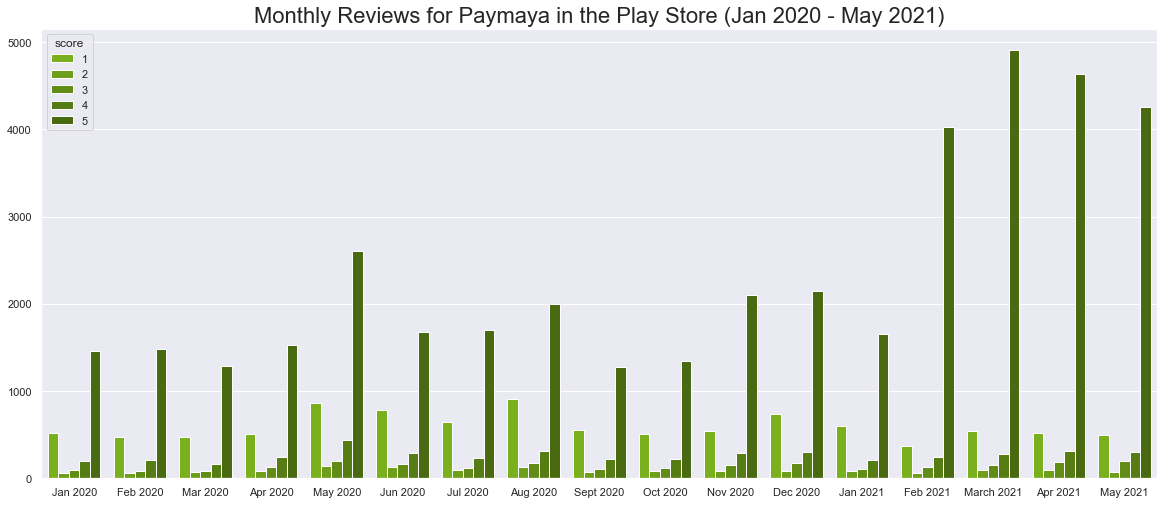

In [209]:
### PLAY STORE PAYMAYA

pm_playstore_df2 = pm_play_df.copy()
pm_playstore_df2['Dates'] = pd.to_datetime(pm_playstore_df2['Dates'])
pm_playstore_df2 = pm_playstore_df2.set_index('Dates')
grouped_play_pm = pm_playstore_df2.groupby([pd.Grouper(freq='M'), 'score']).count().unstack(fill_value=0).stack()
grouped_play_pm.to_csv('/Mynt Capstone/data/grouped_play_pm.csv')
grouped_play_pm = pd.read_csv('/Mynt Capstone/data/grouped_play_pm.csv')
grouped_play_pm = grouped_play_pm.drop(['Time', 'thumbsUpCount', 'repliedAt'], axis=1)
grouped_play_pm = grouped_play_pm.rename(columns = {'final_review':'count'})

colors = ['#80c904', '#73b504', '#66a103', '#5a8d03', '#4d7902']
ax = sns.barplot(x = 'Dates',
            y = 'count',
            palette = colors,
            hue = 'score',
            data = grouped_play_pm)
sns.set(rc={'figure.figsize':(20,8.27)})
# plt.xticks(rotation=70)
ax.set_xticklabels(['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020',
                   'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'March 2021', 'Apr 2021', 'May 2021'])
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Monthly Reviews for Paymaya in the Play Store (Jan 2020 - May 2021)', size = 22)


Text(0.5, 1.0, 'Monthly Reviews for Paymaya in the App Store (Jan 2020 - May 2021)')

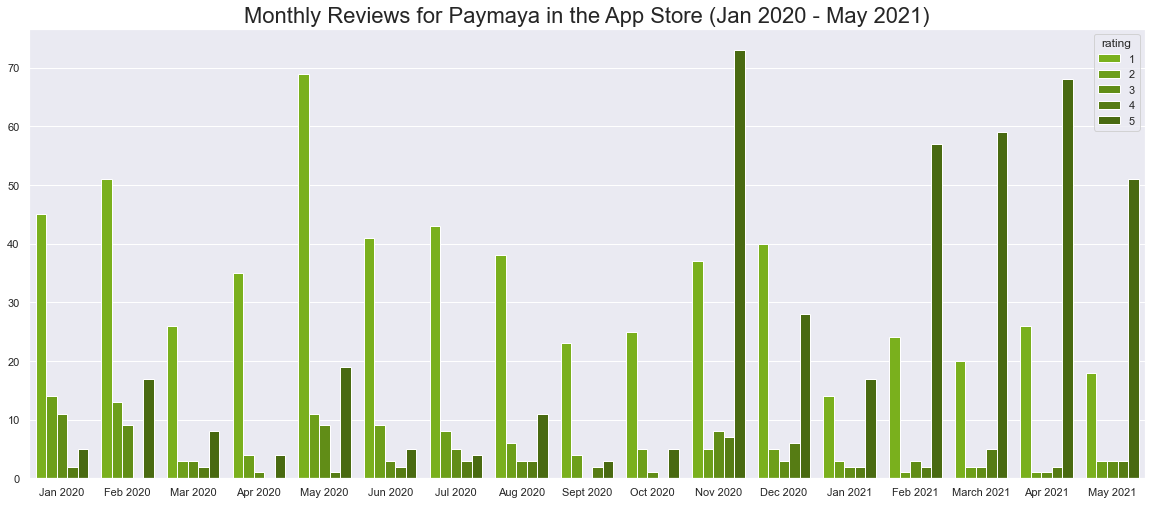

In [210]:
### APP STORE PAYMAYA

pm_apps_df2 = pm_app_df.copy()
pm_apps_df2['Dates'] = pd.to_datetime(pm_apps_df2['Dates'])
pm_apps_df2 = pm_apps_df2.set_index('Dates')
grouped_apps_pm = pm_apps_df2.groupby([pd.Grouper(freq='M'), 'rating']).count().unstack(fill_value=0).stack()
grouped_apps_pm.to_csv('/Mynt Capstone/data/grouped_apps_pm.csv')
grouped_apps_pm = pd.read_csv('/Mynt Capstone/data/grouped_apps_pm.csv')
grouped_apps_pm = grouped_apps_pm.drop(['Time'], axis=1)
grouped_apps_pm = grouped_apps_pm.rename(columns = {'final_review':'count'})

colors = ['#80c904', '#73b504', '#66a103', '#5a8d03', '#4d7902']
ax = sns.barplot(x = 'Dates',
            y = 'count',
            palette = colors,
            hue = 'rating',
            data = grouped_apps_pm)
sns.set(rc={'figure.figsize':(20,8.27)})
# plt.xticks(rotation=70)
ax.set_xticklabels(['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020',
                   'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'March 2021', 'Apr 2021', 'May 2021'])
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Monthly Reviews for Paymaya in the App Store (Jan 2020 - May 2021)', size = 22)

### Additional EDA: Monthly Reviews

In [211]:
gcash_app_ratings_df = gcash_apps_df.groupby([pd.to_datetime(gcash_apps_df['Dates']).dt.year.rename('y'), pd.to_datetime(gcash_apps_df['Dates']).dt.month.rename('m')]).agg(
    rating_sum = pd.NamedAgg(column='rating', aggfunc='sum'),
    review_count = pd.NamedAgg(column='rating', aggfunc='count'),
)

In [213]:
gcash_app_ratings_df['average_rating'] = gcash_app_ratings_df['rating_sum'] / gcash_app_ratings_df['review_count']

In [217]:
gcash_app_ratings_df.to_csv('/Mynt Capstone/data/gcash_app_ratings_df.csv')
gcash_app_ratings_df = pd.read_csv('/Mynt Capstone/data/gcash_app_ratings_df.csv')
gcash_app_ratings_df

,y,m,rating_sum,review_count,average_rating
0,2020,1,149,95,1.568421
1,2020,2,168,98,1.714286
2,2020,3,196,94,2.085106
3,2020,4,368,193,1.906736
4,2020,5,351,198,1.772727
5,2020,6,327,177,1.847458
6,2020,7,366,209,1.751196
7,2020,8,306,170,1.800000
8,2020,9,332,181,1.834254
9,2020,10,283,149,1.899329


In [246]:
gcash_app_ratings_df['date'] = ['2020-01','2020-02', '2020-03', '2020-04', '2020-05', '2020-06', 
                                '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', 
                                '2021-01','2021-02', '2021-03', '2021-04','2021-05']

In [247]:
gcash_app_ratings_df

,y,m,rating_sum,review_count,average_rating,date
0,2020,1,149,95,1.568421,2020-01
1,2020,2,168,98,1.714286,2020-02
2,2020,3,196,94,2.085106,2020-03
3,2020,4,368,193,1.906736,2020-04
4,2020,5,351,198,1.772727,2020-05
5,2020,6,327,177,1.847458,2020-06
6,2020,7,366,209,1.751196,2020-07
7,2020,8,306,170,1.800000,2020-08
8,2020,9,332,181,1.834254,2020-09
9,2020,10,283,149,1.899329,2020-10


<ipython-input-272-ef46ca4c4ad7>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020',
<ipython-input-272-ef46ca4c4ad7>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(i) for i in ax.get_yticks()], fontsize=15)


Text(0.5, 1.0, 'Gcash App Store Average Monthly Rating')

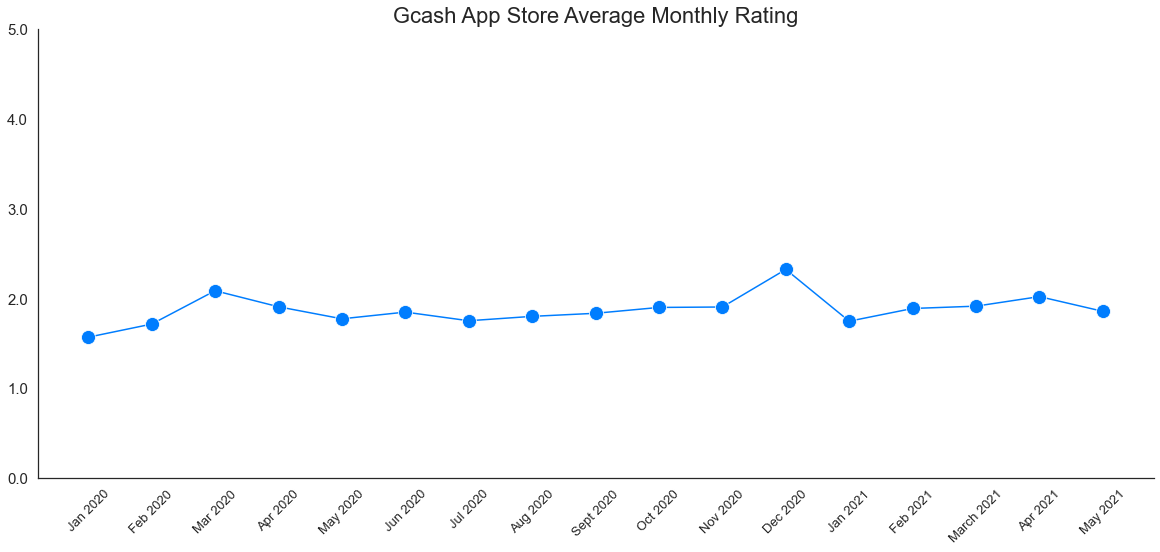

In [272]:
# import matplotlib.ticker as ticker
sns.set_style('white')
plt.figure(figsize=(20, 8.27))
ax = sns.lineplot(
    x="date", 
    y="average_rating",
    color='#007dfe',
    data=gcash_app_ratings_df,
    marker="o",
    markersize=14)

plt.ylim(0, 5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticklabels(['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020',
                   'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'March 2021', 'Apr 2021', 'May 2021'], fontsize=13)
ax.set_yticklabels([str(i) for i in ax.get_yticks()], fontsize=15)
plt.xticks(rotation=45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Gcash App Store Average Monthly Rating', size = 22)

In [47]:
gcash_play_ratings_df = gcash_play_df.groupby([pd.to_datetime(gcash_play_df['Dates']).dt.year.rename('y'), pd.to_datetime(gcash_play_df['Dates']).dt.month.rename('m')]).agg(
    rating_sum = pd.NamedAgg(column='score', aggfunc='sum'),
    review_count = pd.NamedAgg(column='score', aggfunc='count'),
)

In [48]:
gcash_play_ratings_df['average_rating'] = gcash_play_ratings_df['rating_sum'] / gcash_play_ratings_df['review_count']

In [49]:
gcash_play_ratings_df.to_csv('/Mynt Capstone/data/gcash_play_ratings_df.csv')
gcash_play_ratings_df = pd.read_csv('/Mynt Capstone/data/gcash_play_ratings_df.csv')
gcash_play_ratings_df

,y,m,rating_sum,review_count,average_rating
0,2020,1,18585,4692,3.960997
1,2020,2,6200,1760,3.522727
2,2020,3,20608,5170,3.986074
3,2020,4,26360,6989,3.771641
4,2020,5,16842,5278,3.190981
5,2020,6,29391,7543,3.896460
6,2020,7,47957,12611,3.802791
7,2020,8,47197,12709,3.713667
8,2020,9,24088,6823,3.530412
9,2020,10,36099,9726,3.711598


In [50]:
gcash_play_ratings_df['average_rating'].mean()

3.733923894944078

In [12]:
gcash_play_ratings_df['date'] = ['2020-01','2020-02', '2020-03', '2020-04', '2020-05', '2020-06', 
                                '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', 
                                '2021-01','2021-02', '2021-03', '2021-04','2021-05']

In [13]:
gcash_play_ratings_df

,y,m,rating_sum,review_count,average_rating,date
0,2020,1,18585,4692,3.960997,2020-01
1,2020,2,6200,1760,3.522727,2020-02
2,2020,3,20608,5170,3.986074,2020-03
3,2020,4,26360,6989,3.771641,2020-04
4,2020,5,16842,5278,3.190981,2020-05
5,2020,6,29391,7543,3.896460,2020-06
6,2020,7,47957,12611,3.802791,2020-07
7,2020,8,47197,12709,3.713667,2020-08
8,2020,9,24088,6823,3.530412,2020-09
9,2020,10,36099,9726,3.711598,2020-10


<ipython-input-15-1111328fb833>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020',
<ipython-input-15-1111328fb833>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(i) for i in ax.get_yticks()], fontsize=15)


Text(0.5, 1.0, 'Gcash Play Store Average Monthly Rating')

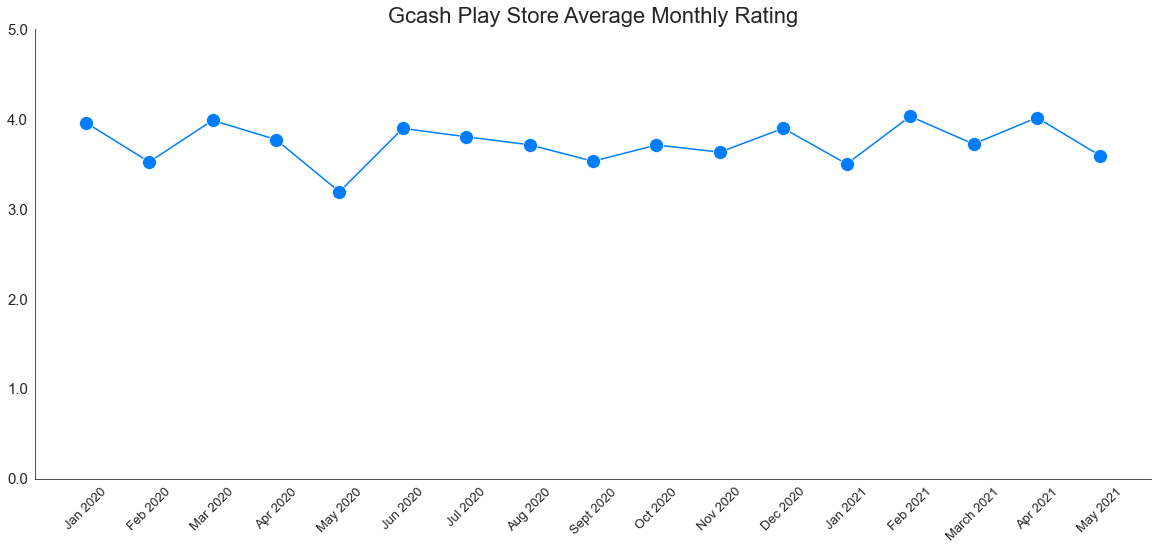

In [15]:
sns.set_style('white')
plt.figure(figsize=(20, 8.27))
ax = sns.lineplot(
    x="date", 
    y="average_rating",
    color='#007dfe',
    data=gcash_play_ratings_df,
    marker="o",
    markersize=14)

plt.ylim(0, 5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticklabels(['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020',
                   'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'March 2021', 'Apr 2021', 'May 2021'], fontsize=13)
ax.set_yticklabels([str(i) for i in ax.get_yticks()], fontsize=15)
plt.xticks(rotation=45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Gcash Play Store Average Monthly Rating', size = 22)

In [16]:
### Percentage for 1-star and 5-Star Reviews
gcash_play_total_df = gcash_play_df.groupby([pd.to_datetime(gcash_play_df['Dates']).dt.year.rename('y'), pd.to_datetime(gcash_play_df['Dates']).dt.month.rename('m')]).agg(
    review_count = pd.NamedAgg(column='score', aggfunc='count'),
)
gcash_play_total_df

review_count
y    m               
2020 1           4692
     2           1760
     3           5170
     4           6989
     5           5278
     6           7543
     7          12611
     8          12709
     9           6823
     10          9726
     11          5046
     12          9358
2021 1           5032
     2           9045
     3           6310
     4          16135
     5           6015

In [28]:
### GETTING PLAY STORE CSV
### Run this after filtering datasets by date
gcash_play_df['App'] = 'Gcash'
pm_play_df['App'] = 'Paymaya'

playstore_df = gcash_play_df.append(pm_play_df, ignore_index = True)
playstore_df.to_csv('/Mynt Capstone/data/playstore_all_df.csv')

playstore_df = pd.read_csv('/Mynt Capstone/data/playstore_all_df.csv')
playstore_df.head()

,Unnamed: 0,Unnamed: 0.1,final_review,score,thumbsUpCount,repliedAt,Dates,Time,App
0,0,4547.0,Very good,5,0,NaN,2021-05-30,23:59:34,Gcash
1,1,4548.0,So good app to me,5,0,NaN,2021-05-30,23:57:27,Gcash
2,2,4549.0,Excellent!,5,0,NaN,2021-05-30,23:45:41,Gcash
3,3,4550.0,It is easy to sending money and load by Gcash.,5,0,NaN,2021-05-30,23:45:05,Gcash
4,4,4551.0,Love it,5,0,NaN,2021-05-30,23:33:04,Gcash


In [29]:
playstore_df.tail()

,Unnamed: 0,Unnamed: 0.1,final_review,score,thumbsUpCount,repliedAt,Dates,Time,App
188689,188689,NaN,great,4,0,NaN,2020-01-02,04:49:15,Paymaya
188690,188690,NaN,Scam. Didn't receive any cashbacks and other t...,1,0,NaN,2020-01-02,04:26:23,Paymaya
188691,188691,NaN,Their paymaya email support (Kath) only ignore...,1,0,NaN,2020-01-02,04:14:38,Paymaya
188692,188692,NaN,"Every time I buy or send load it always says ""...",1,1,NaN,2020-01-02,01:35:41,Paymaya
188693,188693,NaN,Worst online wallet experience ever. You can o...,1,28,NaN,2020-01-02,00:48:03,Paymaya


In [32]:
playstore_df['Dates'] = pd.to_datetime(playstore_df['Dates'])

In [40]:
playstore_total_score_df = playstore_df['Dates'].groupby([playstore_df.Dates.dt.year.rename('y'), playstore_df.Dates.dt.month.rename('m'), playstore_df.App.rename('app'), playstore_df.score]).agg('count')
playstore_total_score_df = playstore_total_score_df.to_frame()

In [41]:
playstore_total_score_df.to_csv('/Mynt Capstone/data/playstore_total_score_df.csv')
playstore_total_score_df = pd.read_csv('/Mynt Capstone/data/playstore_total_score_df.csv')
playstore_total_score_df.rename(columns={'Dates': 'review_count'}, inplace=True)
playstore_total_score_df

,y,m,app,score,review_count
0,2020,1,Gcash,1,861
1,2020,1,Gcash,2,166
2,2020,1,Gcash,3,280
3,2020,1,Gcash,4,373
4,2020,1,Gcash,5,3012
...,...,...,...,...,...
165,2021,5,Paymaya,1,499
166,2021,5,Paymaya,2,76
167,2021,5,Paymaya,3,195
168,2021,5,Paymaya,4,297


In [42]:
play_test_df = playstore_df['Dates'].groupby([playstore_df.Dates.dt.year.rename('y'), playstore_df.Dates.dt.month.rename('m'), playstore_df.App.rename('app')]).agg('count')
play_test_df = play_test_df.to_frame()

In [43]:
play_test_df.to_csv('/Mynt Capstone/data/play_test_df.csv')
play_test_df = pd.read_csv('/Mynt Capstone/data/play_test_df.csv')
play_test_df.rename(columns={'Dates': 'review_count'}, inplace=True)
play_test_df

,y,m,app,review_count
0,2020,1,Gcash,4692
1,2020,1,Paymaya,2339
2,2020,2,Gcash,1760
3,2020,2,Paymaya,2313
4,2020,3,Gcash,5170
5,2020,3,Paymaya,2081
6,2020,4,Gcash,6989
7,2020,4,Paymaya,2479
8,2020,5,Gcash,5278
9,2020,5,Paymaya,4253


In [45]:
play_with_reviewcount = pd.merge(playstore_total_score_df, play_test_df,  how='left', left_on=['y','m', 'app'], right_on = ['y','m', 'app'])
play_with_reviewcount.head(15)

,y,m,app,score,review_count_x,review_count_y
0,2020,1,Gcash,1,861,4692
1,2020,1,Gcash,2,166,4692
2,2020,1,Gcash,3,280,4692
3,2020,1,Gcash,4,373,4692
4,2020,1,Gcash,5,3012,4692
5,2020,1,Paymaya,1,515,2339
6,2020,1,Paymaya,2,63,2339
7,2020,1,Paymaya,3,100,2339
8,2020,1,Paymaya,4,198,2339
9,2020,1,Paymaya,5,1463,2339


In [46]:
play_with_reviewcount['percentage'] = (play_with_reviewcount['review_count_x'] / play_with_reviewcount['review_count_y'])*100
play_with_reviewcount.head(15)

,y,m,app,score,review_count_x,review_count_y,percentage
0,2020,1,Gcash,1,861,4692,18.350384
1,2020,1,Gcash,2,166,4692,3.537937
2,2020,1,Gcash,3,280,4692,5.967604
3,2020,1,Gcash,4,373,4692,7.949702
4,2020,1,Gcash,5,3012,4692,64.194373
5,2020,1,Paymaya,1,515,2339,22.017956
6,2020,1,Paymaya,2,63,2339,2.693459
7,2020,1,Paymaya,3,100,2339,4.275331
8,2020,1,Paymaya,4,198,2339,8.465156
9,2020,1,Paymaya,5,1463,2339,62.548097
